In [1]:
from codecs import open #For func _read_documents
from __future__ import division #For func _read_documents
from collections import Counter #For frequency function
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Function to read file
def read_documents(doc_file):
    labels = []
    docs = []
    all_docs_freq = []
    
    with open(doc_file, encoding='utf-8') as f:
        for line in f:
            
            #Noise reduction - Removing punctuation 
            line = line.replace(","," ")
            line = line.replace("."," ")
            line = line.replace('\"'," ")
            line = line.replace('('," ")
            line = line.replace(')'," ")
            line = line.replace('!'," ")
            
            #Storing data
            words = line.strip().split() 
            labels.append(words[1])
            docs.append(' '.join(words[4:]))
            all_docs_freq.append(words[4:])        
            
    return labels,docs,all_docs_freq

In [3]:
#Task 0

#Reading in data + removing document identifier and topic label
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame

all_labels, all_docs,all_docs_freq = read_documents('all_sentiment_shuffled.txt')

#Counting the frequency of words throughout all reviews
freq = Counter()
for i in range(len(all_docs_freq)):
    for w in all_docs_freq[i]: 
        freq[w] += 1

#Changing freq from list of key-value pairs to list of keys. This way it can be used as a vocabulary for CountVectorizer
num_of_features = 8000 #Change this value to alter the number of features for the models
common = freq.most_common(num_of_features) 
features = []
for i in range(len(common)):
    features.append(common[i][0])

        
#Splitting data into training and testing set
split_point = int(0.80*len(all_docs)) 
train_docs = all_docs[:split_point] 
target_train = all_labels[:split_point] 
eval_docs = all_docs[split_point:] 
target_test = all_labels[split_point:]


#Formatting data using CountVectorizer 
vect = CountVectorizer(vocabulary = features)
data_train = vect.transform(train_docs)
data_test = vect.transform(eval_docs)



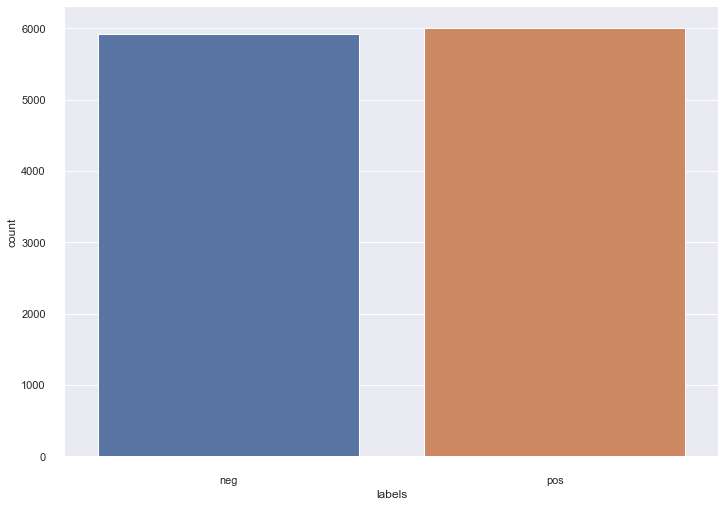

In [4]:
#Task 1

#Forming DataFrame using labels -- allows for easy plotting 
labelsDF = DataFrame(all_labels, columns = ["labels"])

#Plotting data
sns.set(style="whitegrid",color_codes = True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x = 'labels',data=labelsDF)
sns.despine(offset=10, trim=True)

In [5]:
#Task 2: Naive Bayes: Training
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

#Creating object of MultinomialNB and training the data set

#Model Building
mnb = MultinomialNB()
pred = mnb.fit(data_train, target_train).predict(data_train)
print("Naive-Bayes (smoothing = 1) accuracy : ",accuracy_score(target_train, pred, normalize = True))
print("Naive-Bayes (smoothing = 1) weighted recall : ",recall_score(target_train, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 1) weighted precision : ",precision_score(target_train, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 1) weighted f1-measure : ",f1_score(target_train, pred, average = 'weighted'))


#Adjusting hyper-parameters: smoothing
mnb = MultinomialNB(alpha = 0.25)
pred = mnb.fit(data_train, target_train).predict(data_train)
print("\nNaive-Bayes (smoothing = 0.25) accuracy : ",accuracy_score(target_train, pred, normalize = True))
print("Naive-Bayes (smoothing = 0.25) weighted recall : ",recall_score(target_train, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 0.25) weighted precision : ",precision_score(target_train, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 0.25) weighted f1-measure : ",f1_score(target_train, pred, average = 'weighted'))


#Adjusting hyper-parameters: smoothing
mnb = MultinomialNB(alpha = 0.1)
pred = mnb.fit(data_train, target_train).predict(data_train)
print("\nNaive-Bayes (smoothing = 0.1) accuracy : ",accuracy_score(target_train, pred, normalize = True))
print("Naive-Bayes (smoothing = 0.1) weighted recall : ",recall_score(target_train, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 0.1) weighted precision : ",precision_score(target_train, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 0.1) weighted f1-measure : ",f1_score(target_train, pred, average = 'weighted'))

#Adjusting hyper-parameters: smoothing
mnb = MultinomialNB(alpha = 0.05)
pred = mnb.fit(data_train, target_train).predict(data_train)
print("\nNaive-Bayes (smoothing = 0.05) accuracy : ",accuracy_score(target_train, pred, normalize = True))
print("Naive-Bayes (smoothing = 0.05) weighted recall : ",recall_score(target_train, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 0.05) weighted precision : ",precision_score(target_train, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 0.05) weighted f1-measure : ",f1_score(target_train, pred, average = 'weighted'))

#Adjusting hyper-parameters: smoothing
mnb = MultinomialNB(alpha = 0.025)
pred = mnb.fit(data_train, target_train).predict(data_train)
print("\nNaive-Bayes (smoothing = 0.025) accuracy : ",accuracy_score(target_train, pred, normalize = True))
print("Naive-Bayes (smoothing = 0.025) weighted recall : ",recall_score(target_train, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 0.025) weighted precision : ",precision_score(target_train, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 0.025) weighted f1-measure : ",f1_score(target_train, pred, average = 'weighted'))

Naive-Bayes (smoothing = 1) accuracy :  0.8697933060539292
Naive-Bayes (smoothing = 1) weighted recall :  0.8697933060539292
Naive-Bayes (smoothing = 1) weighted precision :  0.8703863913034763
Naive-Bayes (smoothing = 1) weighted f1-measure :  0.8697897541712533

Naive-Bayes (smoothing = 0.25) accuracy :  0.8716818801804638
Naive-Bayes (smoothing = 0.25) weighted recall :  0.8716818801804638
Naive-Bayes (smoothing = 0.25) weighted precision :  0.872180393954905
Naive-Bayes (smoothing = 0.25) weighted f1-measure :  0.8716823350291443

Naive-Bayes (smoothing = 0.1) accuracy :  0.8718917217500787
Naive-Bayes (smoothing = 0.1) weighted recall :  0.8718917217500787
Naive-Bayes (smoothing = 0.1) weighted precision :  0.8723789439812635
Naive-Bayes (smoothing = 0.1) weighted f1-measure :  0.8718926186778012

Naive-Bayes (smoothing = 0.05) accuracy :  0.8719966425348862
Naive-Bayes (smoothing = 0.05) weighted recall :  0.8719966425348862
Naive-Bayes (smoothing = 0.05) weighted precision :  0.

In [6]:
#Task 2: Naive Bayes: Testing
#Model Testing - Chosen smoothing value = 0.05
#Chose 0.05 rather than 0.025 to prevent overfitting 
mnb = MultinomialNB(alpha = 0.05)
pred = mnb.fit(data_train, target_train).predict(data_test)
print("\nNaive-Bayes (smoothing = 0.05) accuracy : ",accuracy_score(target_test, pred, normalize = True))
print("Naive-Bayes (smoothing = 0.05) weighted recall : ",recall_score(target_test, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 0.05) weighted precision : ",precision_score(target_test, pred, average = 'weighted'))
print("Naive-Bayes (smoothing = 0.05) weighted f1-measure : ",f1_score(target_test, pred, average = 'weighted'))




Naive-Bayes (smoothing = 0.05) accuracy :  0.8191355434326479
Naive-Bayes (smoothing = 0.05) weighted recall :  0.8191355434326479
Naive-Bayes (smoothing = 0.05) weighted precision :  0.8192373435226762
Naive-Bayes (smoothing = 0.05) weighted f1-measure :  0.8191620614979724


In [7]:
#Task 2: Base-DT: Training
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(criterion = 'entropy')
pred = clf.fit(data_train,target_train).predict(data_train)
print("\nBase-DT accuracy : ",accuracy_score(target_train, pred, normalize = True))
print("Base-DT weighted recall : ",recall_score(target_train, pred, average = 'weighted'))
print("Base-DT weighted precision : ",precision_score(target_train, pred, average = 'weighted'))
print("Base-DT weighted f1-measure : ",f1_score(target_train, pred, average = 'weighted'))






Base-DT accuracy :  0.9998950792151925
Base-DT weighted recall :  0.9998950792151925
Base-DT weighted precision :  0.9998951016102374
Base-DT weighted f1-measure :  0.9998950794023578


In [8]:
#Task 2: Base-DT: Testing
pred = clf.fit(data_train,target_train).predict(data_test)
print("\nBase-DT accuracy : ",accuracy_score(target_test, pred, normalize = True))
print("Base-DT weighted recall : ",recall_score(target_test, pred, average = 'weighted'))
print("Base-DT weighted precision : ",precision_score(target_test, pred, average = 'weighted'))
print("Base-DT weighted f1-measure : ",f1_score(target_test, pred, average = 'weighted'))





Base-DT accuracy :  0.6852706672261855
Base-DT weighted recall :  0.6852706672261855
Base-DT weighted precision :  0.6865627421261534
Base-DT weighted f1-measure :  0.6852906195529649


In [9]:
#Task 2: Best-DT: Training and testing
#Used class_weight = balanced and splitter = random to attempt to improve performance
#Adjust max_depth
depth = num_of_features-int(0.9*(num_of_features))
clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced', splitter = 'random', max_depth = depth)
pred = clf.fit(data_train,target_train).predict(data_test)

print("Best-DT accuracy : ",accuracy_score(target_test, pred, normalize = True))
print("Best-DT weighted recall : ",recall_score(target_test, pred, average = 'weighted'))
print("Best-DT weighted precision : ",precision_score(target_test, pred, average = 'weighted'))
print("Best-DT weighted f1-measure : ",f1_score(target_test, pred, average = 'weighted'))







Best-DT accuracy :  0.7184221569450273
Best-DT weighted recall :  0.7184221569450273
Best-DT weighted precision :  0.7186792192777415
Best-DT weighted f1-measure :  0.7184837731655974


In [10]:
#Task 3: Writing to file - Helper functions

#Function to print confusion_matrix to file
def mat_to_file(cm):
    f.write('Confusion Matrix: \n\n')
    f.write('               Model Prediction\n')
    f.write('                   pos neg\n')
    f.write('Actual label: pos [' + str(cm[0][0]) + ' ' + str(cm[0][1]) + ']\n')
    f.write('Actual label: neg [' + str(cm[1][0]) + ' ' + str(cm[1][1]) + ']\n\n')
    
#Function to return chosen metrics
def return_metrics():
        recall = str(recall_score(target_test, pred, average = 'weighted'))
        precision = str(precision_score(target_test, pred, average = 'weighted'))
        f1_measure = str(f1_score(target_test, pred, average = 'weighted'))
        accuracy = str(accuracy_score(target_test, pred, normalize = True))
        return recall, precision, f1_measure, accuracy

#Function to output predicted results to ifle
def pred_results():
    f.write("Data format:\n")
    f.write("INDEX_OF_CLASS , PREDICTED CLASS, ACTUAL CLASS\n\n")
    for i in range(len(pred)):
        f.write(str(int((0.80*len(all_docs))+i)) + " , " + pred[i] + " , " + target_test[i] + "\n")

In [11]:
#Task 3: Writing to file - Output code

#Naive Bayes Output File
mnb = MultinomialNB(alpha = 0.05)
pred = mnb.fit(data_train, target_train).predict(data_test)
nb_recall,nb_precision,nb_f1,nb_accuracy = return_metrics()

with open("[naive_bayes]-[dataset].txt", "w+") as f:
    
    #Confusion Matrix
    cm = confusion_matrix(target_test,pred, labels =['pos','neg'])
    mat_to_file(cm)
    
    #Precision, Recall, and F1-Measure
    f.write('Recall: ' + nb_recall + '\n')
    f.write('Precision: ' + nb_precision + '\n')
    f.write('F1 Measure: ' + nb_f1 + '\n')
    
    #Accuracy
    f.write('Accuracy: ' + nb_accuracy + '\n\n')
    
    #Results
    pred_results()
    

#DT_BASE_Output_File
clf = DecisionTreeClassifier(criterion = 'entropy')
pred = clf.fit(data_train,target_train).predict(data_test)
dt_base_recall,dt_base_precision,dt_base_f1,dt_base_accuracy = return_metrics()

with open("[dt_base]-[dataset].txt", "w+") as f:
    
    #Confusion Matrix
    cm = confusion_matrix(target_test,pred, labels =['pos','neg'])
    mat_to_file(cm)
    
    #Precision, Recall, and F1-Measure
    f.write('Recall: ' + dt_base_recall + '\n')
    f.write('Precision: ' + dt_base_precision + '\n')
    f.write('F1 Measure: ' + dt_base_f1 + '\n')
    
    #Accuracy
    f.write('Accuracy: ' + dt_base_accuracy + '\n\n')
    
    #Results
    pred_results()
    

    
    
#DT_BEST_Output_File
clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced', splitter = 'random')
pred = clf.fit(data_train,target_train).predict(data_test)
dt_best_recall,dt_best_precision,dt_best_f1,dt_best_accuracy = return_metrics()

with open("[dt_best]-[dataset].txt", "w+") as f:
    
    #Confusion Matrix
    cm = confusion_matrix(target_test,pred, labels =['pos','neg'])
    mat_to_file(cm)
    
    #Precision, Recall, and F1-Measure
    f.write('Recall: ' + dt_best_recall + '\n')
    f.write('Precision: ' + dt_best_precision + '\n')
    f.write('F1 Measure: ' + dt_best_f1 + '\n')
    
    #Accuracy
    f.write('Accuracy: ' + dt_best_accuracy + '\n\n')
    
    #Results
    pred_results()
    




In [14]:
#Task 4: Error Analysis 

#Error Analysis - Naive Bayes
mnb = MultinomialNB(alpha = 0.05)
pred = mnb.fit(data_train, target_train).predict(data_test)

#Creating an array that stores the index of all misclassified classes
misclass = []
for i in range(len(pred)):
    if pred[i] != target_test[i]:
        misclass.append(int((0.80*len(all_docs))+i))

#for loop to double check the misclass logic - debug
for i in range(len(misclass)):
    if all_labels[(misclass[i])] != target_test[misclass[i]-(int(0.80*len(all_docs)))]:
        print("LOGIC IS WRONG")
        
#BELOW: ERROR ANALYSIS OF TWO REVIEWS        

# Analysis of misclassified document: DOC 9540
# all_docs[misclass[0]] - UNCOMMENT TO SEE REVIEW

# DOC 9540 is a neg review that is classified as pos:
# NOTE: WORDS ARE CAPITALISED IN SAMPLES FROM THE REVIEW IF I BELIEVE THAT THEY WOULD THROW THE MODEL OFF TARGET
# 
# possible reasons:
# (1): The reviewer makes use of a word(feature) that is commonly associated with positive reviews
#      "I agree with other reviewers that it feels GOOD"
# counter arguments:
# (1): There are two 'negative' words(features) within the review that should serve to counteract the positive one
#      "nasty", "bad",
#
# evaluation:
# Overall, I believe that a lack of data is at issue. It could be that the model needs to be trained 
# primarily with data(reviews) that are negative but include positive words. 
# Training the model this way would help it differentiate between a model that is positive and one 
# that is negative but contains positive words.
#
# Having said that, training a model that way may result in a model that tends to classify positive reviews as negative.





# Analysis of misclassified document: DOC 9564
# all_docs[misclass[8]] - UNCOMMENT TO SEE REVIEW

# DOC 9564 is a neg review that is classified as pos:
# 
# possible reasons:
# (1): The review is significantly shorter than most other reviews in the data sample.
#     - There is less data (features) for which the model can use to predict
# (2): The review contains no feature that is explicitly 'negative'
#.    - The fact that the review is negative can only be understood  when taking the words in 
#       context with each other. For example:
#       "the price is too high"
#       Individually: 'the', 'price','is','too','high'
#.      When seperated, one can see that the features(words) could easily be used in a positive review
# 
# counter arguments:
# (1): No real counter-argument
# (2): The model arguably does not need to account for context. Theoretically, (with sufficient data), the model
#      should be able to use the individual conditional probabilities of each feature to arrive at an accurate answer.
#
# evalutation:
# Ultimately, I believe that the mix between (1) and (2) (the fact that it's short and has no explicit feature)
# resulted in the misclassification of this document. There was simply not enough data in the review.
# Both in the number of features that it contained and that the entropy of each of the included features
# is, presumably, relatively high